# 🐶 Kaggle End-to-End Multiclass Dog Breed Classification 🐶
### Kaggle Dog Breed Identification: Determine the breed of a dog in an imageKaggle 
Our goal is to answer that ubiquitous question we all ask when meeting a four-legged stranger: what kind of good pup is that?

## Dataset Description
You are provided with a [training set and a test set of images of dogs](https://www.kaggle.com/c/dog-breed-identification/data). Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to **create a classifier capable of determining a dog's breed from a photo**. 

In this playground competition, you are provided a strictly canine subset of `ImageNet` in order to practice fine-grained image categorization. With `120` breeds of dogs and a limited number training images per class, you might find the problem more, err, ruff than you anticipated.

### File descriptions
* `train.zip` - the training set, you are provided the breed for these dogs
* `test.zip` - the test set, you must predict the probability of each breed for each image
* `sample_submission.csv` - a sample submission file in the correct format
* `labels.csv` - the breeds for the images in the train set

### Acknowledgments
We extend our gratitude to the creators of the [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) for making this competition possible: Aditya Khosla, Nityananda Jayadevaprakash, Bangpeng Yao, and Fei-Fei Li.

### Evaluation
Submissions are evaluated on [Multi Class Log Loss](https://www.kaggle.com/wiki/MultiClassLogLoss) between the predicted probability and the observed target.

### Submission File
For each image in the test set, you must predict a probability for each of the different breeds. The file should contain a header and have the following format:

    id,affenpinscher,afghan_hound,..,yorkshire_terrier
    000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
    etc.

### Reference
    @misc{dog-breed-identification,
        author = {Will Cukierski},
        title = {Dog Breed Identification},
        year = {2017},
        howpublished = {\url{https://kaggle.com/competitions/dog-breed-identification}},
        note = {Kaggle}
    }

We can unzip a file using code as follows:

`!unzip "C:\Users\cypro\Documents\dog_breed_classification\data.zip"` -d `"C:\Users\cypro\Documents\dog_breed_classification\data"`

## Setting up our work environment
    !pip install tensorflow-hub
    !pip install tensorflow-datasets
    !pip install tf-keras
### Import needed packages
**Note**: GPU support on native-Windows is only available for **tensorflow version 2.10** or earlier. You will have to install tensorflow as follows: `pip install tensorflow==2.10.0`. You may have to uninstall any later version before installing version 2.10.

Install GPU plugin `pip install tensorflow-directml-plugin`

`conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0`

`pip install numpy==1.21.5` for ananconda 2022.05

Installation instructions:

Open Anaconda prompt and use the following instruction.  

After 2.9 :

`conda install intel-tensorflow -c https://software.repos.intel.com/python/conda/`

2.9 and ealier :

`conda install tensorflow -c https://software.repos.intel.com/python/conda/`

Note: please use the following instructions if you install TensorFlow* v2.8 for missing python-flatbuffers module in TensorFlow* v2.8.

`conda install tensorflow python-flatbuffers -c https://software.repos.intel.com/python/conda/`

In case your anaconda channel is not the highest priority channel by default(or you are not sure), use the following command to make sure you get the right TensorFlow with Intel optimizations

`conda install tensorflow -c anaconda`


Accelerating TensorFlow on Intel Data Center GPU Flex Series

`pip install tensorflow==2.10.0`

`pip install intel-extension-for-tensorflow[gpu]`

https://github.com/tensorflow/docs/tree/master/site/en/hub/tutorials

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(f'TF version: {tf.__version__}')

TF version: 2.10.0


### If the version of TF is not 2.x in Google Colab
    try:
        tensorflow_version 2.x
    except Exception:
        pass

Then run `import tensorflow as tf`

### Using a GPU
**Tensorflow hub** contains pre-trained deep learning models.

**Note**: `tensorflow_gpu-2.10.0` is compactible with `Python 3.7 - 3.10, cuDNN 8.1` and `cuda 11.2`.

`pip install tensorflow-gpu` latest version

`pip install tensorflow-gpu==2.10.0`

In [2]:
import tensorflow_hub as hub
print(f'TF-Hub version: {hub.__version__}')

TF-Hub version: 0.16.1


#### `TensorFlow` and `PyTorch` methods directly check if a compatible GPU is available for deep learning tasks.
* For TensorFlow, you can check the available **GPUs** with:

In [3]:
print('GPU is', 'available' if tf.config.list_physical_devices('GPU') else 'NOT AVAILABLE')

GPU is available


**Import tensorflow-gpu using `pip install tensorflow_gpu==2.10.0`**

* For PyTorch, check if **CUDA** is available:

`pip install backports.os`

In [4]:
import torch

print('GPU is', 'available' if torch.cuda.is_available() else 'NOT AVAILABLE')

GPU is available


#### `GPUtil` provides more detailed information about all GPUs available on your system, including their IDs and names, which is helpful in multi-GPU systems.

In [5]:
import GPUtil

# Get the list of available GPUs
gpus = GPUtil.getGPUs()

if gpus:
    print('GPU(s) are available:')
    for gpu in gpus:
        print(f'GPU {gpu.id}: {gpu.name}')
else:
    print('No GPU is available')

GPU(s) are available:
GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU


### 1. Driver and CUDA Version Mismatch:
Both TensorFlow and PyTorch rely on CUDA (the parallel computing platform for GPUs) to access the GPU. If the version of CUDA installed on your system is not compatible with the versions of TensorFlow or PyTorch you're using, the libraries may not be able to detect or use the GPU.

* TensorFlow: TensorFlow 2.x typically requires CUDA 11.x (for TensorFlow 2.4+) and cuDNN 8.x.
* PyTorch: Check the compatible CUDA version for your installed PyTorch version.

### 2. Incorrect Installation of TensorFlow or PyTorch:
It's possible that the version of TensorFlow or PyTorch installed on your system is the CPU-only version, meaning it does not have GPU support. This is common when installing these libraries via pip without explicitly specifying the GPU version.

* TensorFlow: Make sure you have installed the GPU version of TensorFlow. You can install it by running `pip install tensorflow-gpu`
* PyTorch: Similarly, make sure you installed the GPU version of PyTorch by running `pip install torch torchvision torchaudio`

### 3. TensorFlow and PyTorch Detecting Different CUDA Configurations:
Even if CUDA and the GPU drivers are correctly installed, TensorFlow and PyTorch might be detecting different CUDA configurations or different versions of the CUDA toolkit installed on your system. This can happen if there are multiple versions of CUDA installed, or if the environment variables are set incorrectly.

**Solution:**

Check Environment Variables: Ensure that the environment variables such as `CUDA_HOME` are set correctly to point to the correct CUDA installation. You can check this by running:

    echo $CUDA_HOME  # Linux/macOS
    echo %CUDA_HOME% # Windows (in cmd)

It should point to the directory where CUDA is installed, e.g., `/usr/local/cuda` (Linux) or `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2` (Windows).

## Getting the Data ready
### Load Data Labels

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
labels_csv = pd.read_csv('./data/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


### How many image are there of each breed?

In [9]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

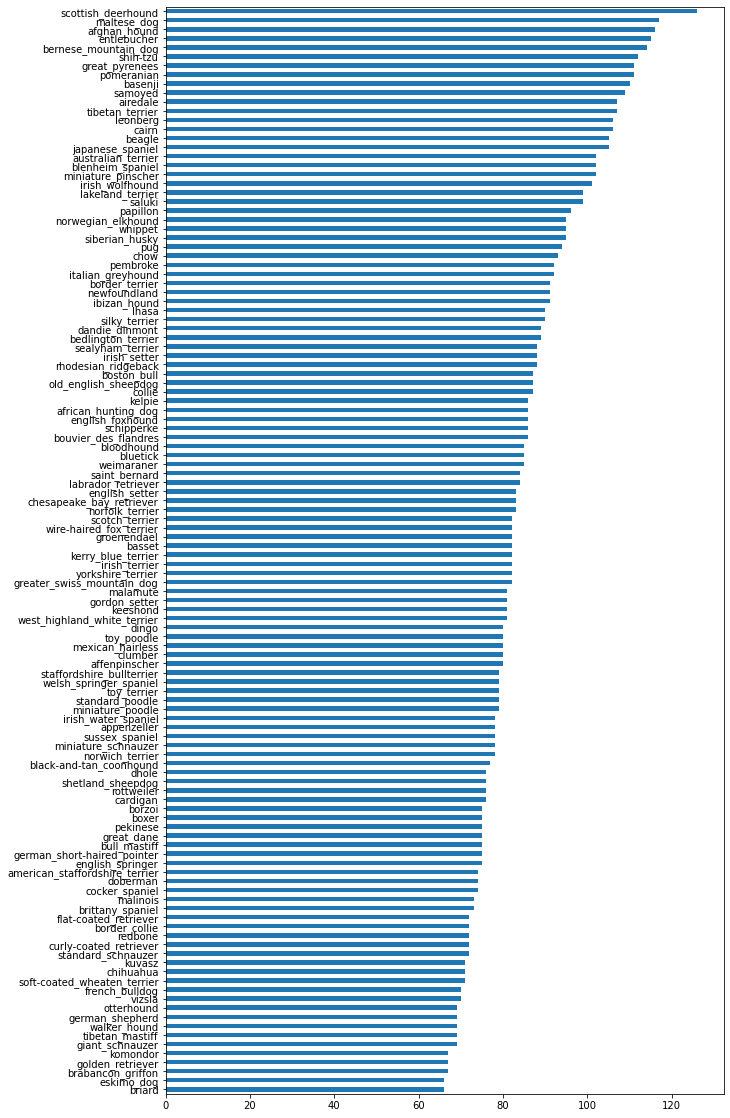

In [10]:
labels_csv['breed'].value_counts().sort_values().plot.barh(figsize = (10, 20));

### How many images are there per class?

In [11]:
labels_csv['breed'].value_counts().sort_values().describe()

count    120.000000
mean      85.183333
std       13.298122
min       66.000000
25%       75.000000
50%       82.000000
75%       91.250000
max      126.000000
Name: breed, dtype: float64

On average, there are `85` images per class and there are `120` different classes of dog breeds.
### Visualize sample images

In [12]:
from IPython.display import Image

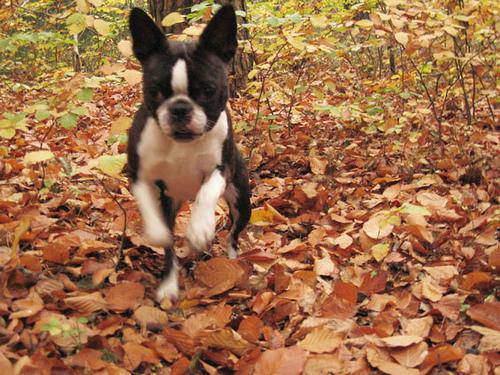

In [13]:
Image('./data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

### Get a list of all images pathnames

In [14]:
filenames = ['./data/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:10]

['./data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Check whether number of filenames matches number of actual image files

In [15]:
import os

if len(os.listdir('./data/train/')) == len(filenames):
    print('Filenames match actual amount of files!')
else:
    print('Filenames do not match actual amount of files! Check target directory')

Filenames match actual amount of files!


### Getting the labels ready

In [16]:
import numpy as np

labels = labels_csv['breed'].to_numpy()
print(len(labels))
labels

10222


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
if len(os.listdir('./data/train/')) == len(labels):
    print('Filenames match actual amount of labels!')
else:
    print('Filenames do not match actual amount of labels! Check target directory')

Filenames match actual amount of labels!


### Unique Labels

In [18]:
unique_breeds = np.unique(labels)
print(len(unique_breeds))
unique_breeds

120


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

### Turning every label into a boolean array

In [19]:
boolean_labels = [label == unique_breeds for label in labels]
print(len(boolean_labels))
boolean_labels[:2]

10222


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Turning boolean array into integers

In [20]:
integer_labels = [list(map(int, bool_list)) for bool_list in boolean_labels]
print(len(integer_labels))
print(integer_labels[:2])

10222
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


### Creating a validation dataset
The dataset does not include a validation set. We are going to create one.

We are going to start with `1000` images and then increase as required after we have got an idea on how the model is working.

In [21]:
X = filenames
y = integer_labels

### Set the number of images to use for experimenting
#### Create a slider in Colab
`NUM_IMAGES = 1000 #@param {type: 'slider', min: 1000, max: 10000, step: 1000}` 
#### Create a slider in Jupyter notebook

In [22]:
import ipywidgets as widgets
from IPython.display import display

In [23]:
slider = widgets.IntSlider(
    value=1000,
    min=1000,
    max=10000,
    step=1000,
    description='NUM_IMAGES:',
    continuous_update=False
)

display(slider)

IntSlider(value=1000, continuous_update=False, description='NUM_IMAGES:', max=10000, min=1000, step=1000)

In [24]:
NUM_IMAGES = slider.value
print(f'Number of images: {NUM_IMAGES}')

Number of images: 1000


### Splitting our data into train and validation sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)

print(len(X_train), len(y_train))
print(len(X_val), len(y_val))

800 800
200 200


### Converting images into tensors
We are going to define a helper function for this preprocessing step. We make use of Tensorflow's [Load and preprocess images ](https://www.tensorflow.org/tutorials/load_data/images) tutorials.

In [27]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

def process_image(image_path):
    '''Takes an image path and converts the image into a tensor'''
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels = 3)        # convert to tensor
    image = tf.image.convert_image_dtype(image, tf.float32)  # from (0 - 255) to (0 - 1)
    image = tf.image.resize(image, size = (IMG_WIDTH, IMG_HEIGHT))
    return image

In [28]:
image_0 = process_image(filenames[0])
image_0

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.6106238 , 0.43763596, 0.21601711],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252919 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.3064293 ],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.58835477, 0.43225706, 0.24031551],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.8607247 , 0.74250627, 0.36941224],
        [0.7678166 , 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.4255411 , 0.270394  , 0.12009468],
        [0.7887874 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.8860953 , 0.7585917 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.71

### Turning data into batches
It would be appropriate for our data to be in the form `(image, label)` tensor to effectively use tensorflow. Let's define a helper function for this step.

In [29]:
def get_image_label(image_path, label):
    """
    input arguments: image path, image label
    return: tensor(image, label)
    """
    image = process_image(image_path)
    return image, label

In [30]:
image_0 = get_image_label(filenames[0], tf.constant(integer_labels[0]))
print(image_0)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.6106238 , 0.43763596, 0.21601711],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252919 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.3064293 ],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.58835477, 0.43225706, 0.24031551],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.8607247 , 0.74250627, 0.36941224],
        [0.7678166 , 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.4255411 , 0.270394  , 0.12009468],
        [0.7887874 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.8860953 , 0.7585917 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.7

**Let's make a helper function to convert all the images and labels into `Tensor(image, label)` in batches**

In [31]:
BATCH_SIZE = 32
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    """
    X = filenames
    y = integer_labels
    Creates batches of image (data (X), label (y)) pairs
    NOTE: when test_data = True, y = None (test data has not labels)
    """
    if test_data:
        print('Creating test data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    # If validation data, no shuffling
    elif valid_data:
        print('Creating validation data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))  
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print('Creating training data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) 
        data = data.shuffle(buffer_size = len(X))  # shuffling before mapping is faster
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [32]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


### Check out the different attributes of our training data batches

In [33]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)))

### Visualizing the data batches
We'll define a helper function to visualize our data

In [34]:
def show_25_images(images, labels):
    """
    images: input images
    labels: input labels (integers array)
    """
    plt.figure(figsize = (13, 13))
    for i in range(25):
        fig = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis('off')

In [35]:
train_images, train_labels = next(train_data.as_numpy_iterator())

In [36]:
len(train_images), len(train_labels)

(32, 32)

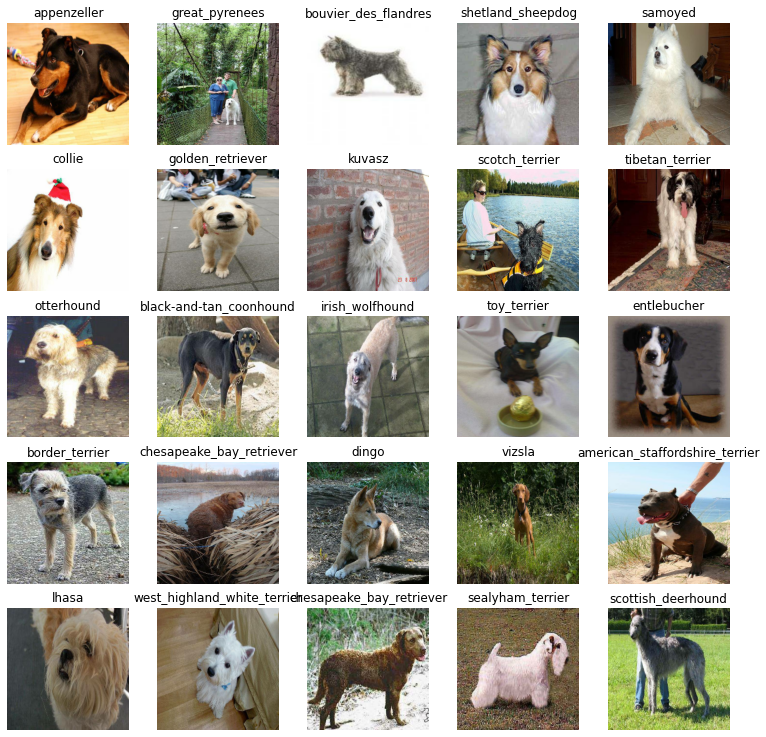

In [37]:
show_25_images(train_images, train_labels)

### Visualize validation data

In [38]:
val_images, val_labels = next(val_data.as_numpy_iterator())

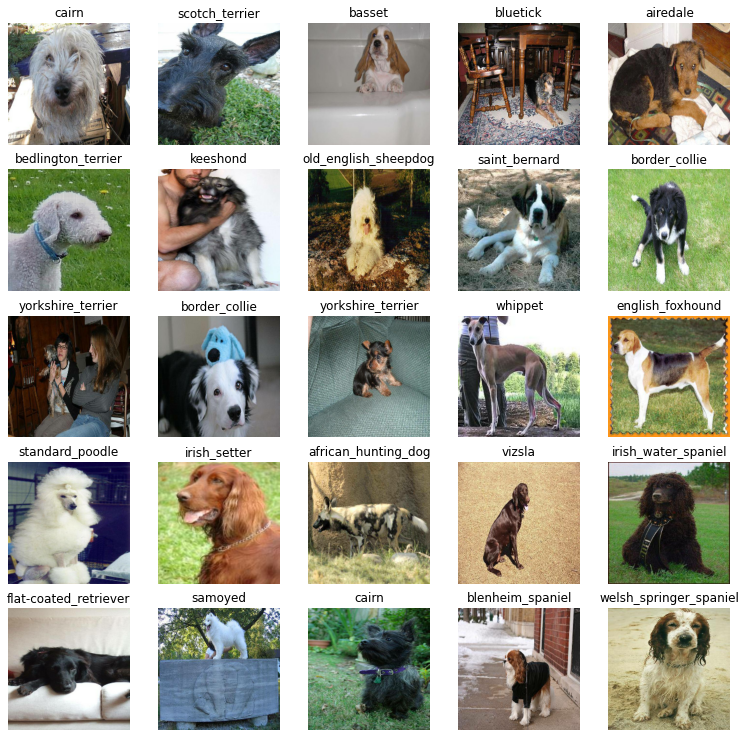

In [39]:
show_25_images(val_images, val_labels)

## Building the model
Instead of building a model from scatch, we are going to use `transfer learning` approach. This is using a pretrained model as our starting model, then update or fine tuned its weights or parameters using our training dataset.

`https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2`

In [41]:
INPUT_SHAPE = (None, IMG_WIDTH, IMG_HEIGHT, 3)
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2'

### Build the model
#### MobileNet V2 Architecture

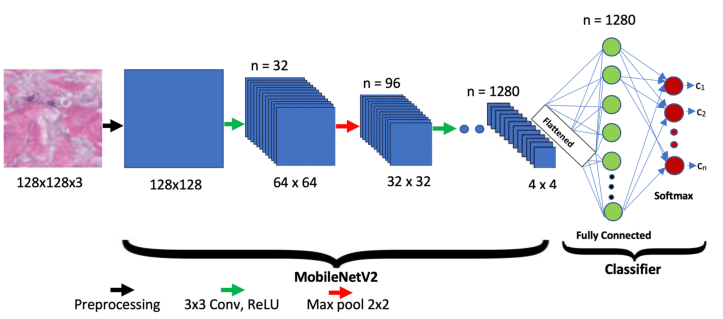

We are going to use a helper function to define and compile our model.

Note that we decided that our image size should be `124 x 124` but we could as well use `128 x 128` or any other dimension as deemed necessary. 

In [44]:
def create_model(input_shape = INPUT_SHAPE,
                 output_shape = OUTPUT_SHAPE,
                 model_url = MODEL_URL,
                ):
    print(f'Building model with: {MODEL_URL}')
    
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                              activation = 'softmax'
                             )
        
    ])
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ['accuracy']
    )
    model.build(INPUT_SHAPE)
    return model

In [45]:
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


We get `5,432,713` parameters already trained by using transfer learning or a pretrained model. Our model will train just `120,240` parameters. This should make it faster compared to if it were to train `5 million+` parameters!

### Creating some helper callback functions
#### Tensorboard callback
* We need a tensorboard notebook extension ✅
* Create a tensorboard callback to save logs to a directory ✅
* Visualize our model's training logs with `%tensorboard` magic function ✅

In [46]:
%load_ext tensorboard

In [48]:
import datetime

In [60]:
def create_tensorboard_callback():
    logdir = os.path.join('./logs', 
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping callback: Preventing Overfitting
An early stopping callback stops the training when the metrics is no longer improving. This helps to prevent `overfitting`, that is, it prevents the model from learning patterns that are not part of the distribution from which the data was generated. Early stopping prevent the model from learning noise which cannot generalize to test data or data not previously seen by the model.

In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)

## Training the model (on a subset of data)

In [52]:
slider = widgets.IntSlider(
    value=100,
    min=10,
    max=100,
    step=5,
    description='NUM_EPOCHS',
    continuous_update=False
)

display(slider)

IntSlider(value=100, continuous_update=False, description='NUM_EPOCHS', min=10, step=5)

In [53]:
NUM_EPOCHS = slider.value
print(f'Number of epochs: {NUM_EPOCHS}')

Number of epochs: 100


### Define a helper function to train a model

In [57]:
def train_model():
    '''Train and return a model'''
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x = train_data,
             epochs = NUM_EPOCHS,
             validation_data = val_data,
             validation_freq = 1,
             callbacks = [tensorboard, early_stopping])
    return model

### Train on CPU

In [58]:
from timeit import default_timer as timer

with tf.device('/CPU:0'):
    start = timer()
    model_cpu = train_model()
    end = timer()

print(f'CPU time: {end - start}')

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Epoch 1/100
25/25 [==============================] - 11s 366ms/step - loss: 4.5993 - accuracy: 0.1063 - val_loss: 3.5297 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 9s 345ms/step - loss: 1.6414 - accuracy: 0.6888 - val_loss: 2.2369 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 8s 339ms/step - loss: 0.5613 - accuracy: 0.9325 - val_loss: 1.7443 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 8s 341ms/step - loss: 0.2482 - accuracy: 0.9900 - val_loss: 1.5358 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 9s 347ms/step - loss: 0.1464 - accuracy: 0.9987 - val_loss: 1.4555 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 9s 342ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.4190 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============

### Train on GPU

In [59]:
with tf.device('/GPU:0'):
    start = timer()
    model_gpu = train_model()
    end = timer()

print(f'GPU time: {end - start}')

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Epoch 1/100
25/25 [==============================] - 6s 118ms/step - loss: 4.5449 - accuracy: 0.1013 - val_loss: 3.4874 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 2s 83ms/step - loss: 1.6197 - accuracy: 0.6900 - val_loss: 2.2393 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 2s 87ms/step - loss: 0.5551 - accuracy: 0.9412 - val_loss: 1.7422 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 2s 90ms/step - loss: 0.2506 - accuracy: 0.9850 - val_loss: 1.5542 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 2s 83ms/step - loss: 0.1462 - accuracy: 0.9975 - val_loss: 1.4787 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 2s 84ms/step - loss: 0.0995 - accuracy: 1.0000 - val_loss: 1.4207 - val_accuracy: 0.6400
Epoch 7/100
25/25 [====================

That's great! The training took just `1/4` of the time it took using CPU when using GPU! 

As we can see, the training stopped after completing just 9 epochs (using GPU) and 11 epoch (on CPU). This is because the validation accuracy stopped improving after 3 epochs, as we indicated when the early stopping callback was defined. 

#### Observations
The training accuracy reached `100%` while validation accuracy is just `63%`. This is a classic example of `overfitting`! The model is performing well on the training data but poorly on the validation data.

Other approaches to overcomming overfitting would be to use more training data or using `dropout` layers and `weights regularization`.

### Evaluating Model Performance with Tensorboard
The tensorboard magic function `%tensorboard` will access the log directory we created earlier and visualize its content.

NOTE: If there are several log files in the directory, you can uncheck corresponding check boxes if you don't wish to see the evaluation.

In [63]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 24192), started 0:05:30 ago. (Use '!kill 24192' to kill it.)

## Making Predictions using the validation dataset
Note the the validation set (`val_data`) was not used in training the model.

In [64]:
predictions = model_gpu.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 1s 63ms/step


array([[1.53530901e-03, 3.23662607e-05, 1.87997299e-03, ...,
        2.26951973e-03, 1.49572425e-05, 2.23347778e-03],
       [9.53696854e-03, 1.17504294e-03, 1.02201924e-02, ...,
        2.01778626e-03, 1.22572167e-03, 4.35561960e-04],
       [4.28227531e-06, 3.04102414e-05, 4.87327407e-06, ...,
        5.87740715e-06, 4.04154016e-05, 9.67500091e-05],
       ...,
       [4.03604427e-05, 1.28055162e-05, 4.84742777e-04, ...,
        1.30119966e-04, 3.07860319e-04, 2.24246505e-05],
       [4.15189378e-03, 7.07904910e-05, 3.47335299e-04, ...,
        1.28966669e-04, 1.05255247e-04, 7.62320869e-03],
       [8.01483402e-04, 1.57695067e-05, 2.22496310e-04, ...,
        1.24121998e-02, 5.42237598e-04, 1.34072834e-04]], dtype=float32)

The `predictions` is a list of lists. Each list is of lenth `120`, each representing a probability prediction of a particular class.

In [65]:
print(predictions.shape)
print(len(predictions[0]))

(200, 120)
120


Since the predictions are probabilities, they should sum up to `1` (probably with some rounding errors). 
Let's look at the first prediction.

In [66]:
sum(predictions[0])

0.9999999410024429

The index with the highest probability corresponds to the index of the predicted dog class.

In [67]:
unique_breeds[predictions[0].argmax()]

'border_terrier'

## Transforming Predictions to corresponding text Labels
We'll define a helper function for this task.

In [92]:
def get_prediction_labels(predictions):
    '''Convert an array of probabilities into labels'''
    
    return np.array([unique_breeds[np.argmax(pred_probs)] for pred_probs in predictions])

In [93]:
prediction_labels = get_prediction_labels(predictions)

### Get the true validation labels from batched validation data
We'll have to `unbatch` the validation set before getting the true labels.
#### Helper function to unbatch a tensor dataset

In [94]:
def unbatch_data(batch_data):
    '''batch_data is a tensor'''
    unbatch_data = []
    unbatch_labels = []
    for data, label in batch_data.unbatch().as_numpy_iterator():
        unbatch_data.append(data)
        unbatch_labels.append(label)
    return np.array(unbatch_data), np.array(unbatch_labels) 

In [95]:
unbatch_val_images, unbatch_val_labels = unbatch_data(val_data)

In [96]:
true_labels = [unique_breeds[label.argmax()] for label in unbatch_val_labels]

In [97]:
acc = sum(prediction_labels == true_labels) / len(true_labels)
print(acc)

0.63


This is the validation accuracy (`63%`) we obtained during training. Let's find out where the model got it the classification wrong. We can do this bu visualizing the model predictions.
### Visualizing the Model Predictions
Let's define a function that shows a specific number of predicted images with labels showing whether the prediction was correct or false, including the level of confidence of the prediction.

In [155]:
def plot_image(i, predictions, unbatch_labels, unbatch_images):
    true_labels = [label for label in unbatch_labels]
    true_label_idx = np.argmax(true_labels[i])
    image =  unbatch_images[i]
    pred_probs = predictions[i]
    pred_idx = np.argmax(pred_probs)

    if pred_idx == true_label_idx:
        color = 'green'
    else:
        color = 'red'
        
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(f'{unique_breeds[pred_idx]} {100*np.max(predictions[i]): .2f}% ({unique_breeds[true_label_idx]})', 
               color=color)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

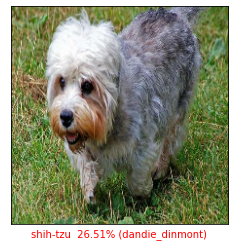

In [156]:
i = 30
plot_image(i, predictions, unbatch_val_labels, unbatch_val_images)

### Helper function to visualize the Top 10 predictions from the 120 possible predictions

In [206]:
def plot_value_array(i, predictions, unbatch_labels):
    pred_probs = predictions[i]
    top_10_indices = pred_probs.argsort()[-10:][::-1]
    
    true_labels = [label for label in unbatch_labels]
    true_label_idx = np.argmax(true_labels[i][top_10_indices])
    pred_idx = np.argmax(pred_probs[top_10_indices])
    
    bars = plt.bar(np.arange(len(pred_probs[top_10_indices])), 
                   pred_probs[top_10_indices], color="#777777")
    
    # Highlight the predicted and true class
    bars[pred_idx].set_color('red')  # prediction
    bars[true_label_idx].set_color('green') # True label
    plt.xticks(np.arange(len(pred_probs[top_10_indices])), 
               labels = unique_breeds[top_10_indices],
              rotation = 90)
    plt.grid(False)
    plt.ylim([0, 1])

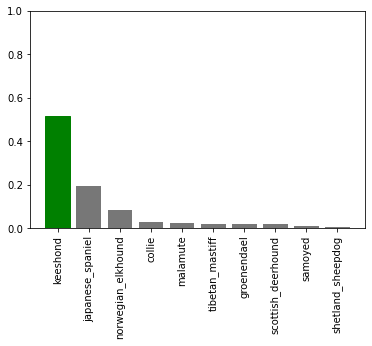

In [212]:
i = 6
plot_value_array(i, predictions, unbatch_val_labels)

### Using our helper functions

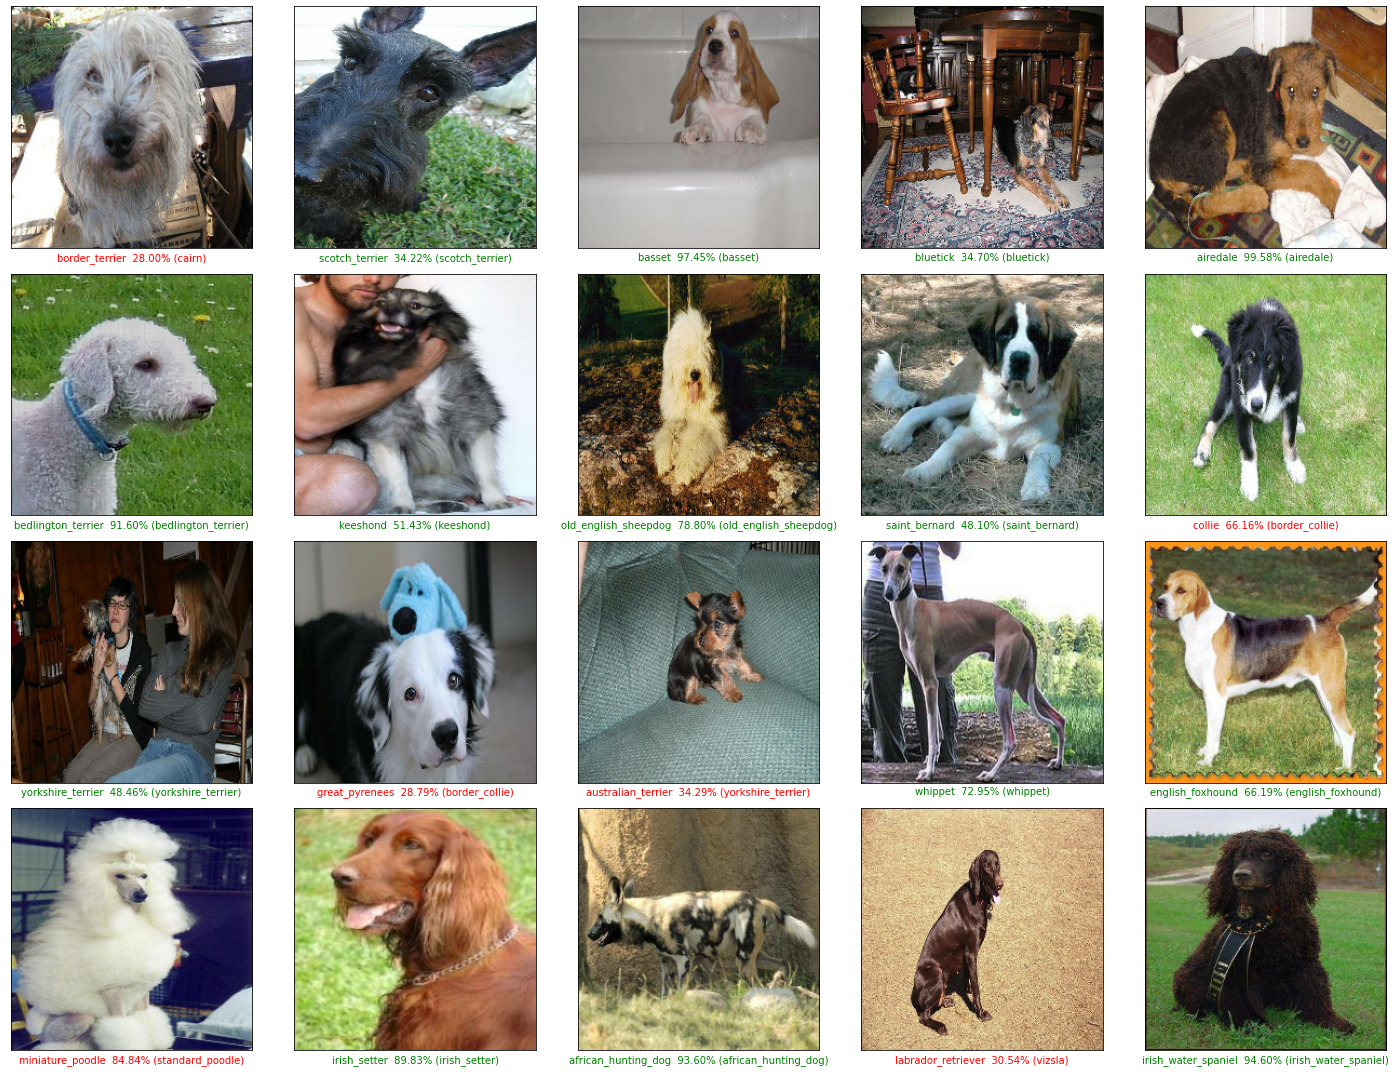

In [157]:
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize = (20, 15))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, unbatch_val_labels, unbatch_val_images)
plt.tight_layout()
plt.show()

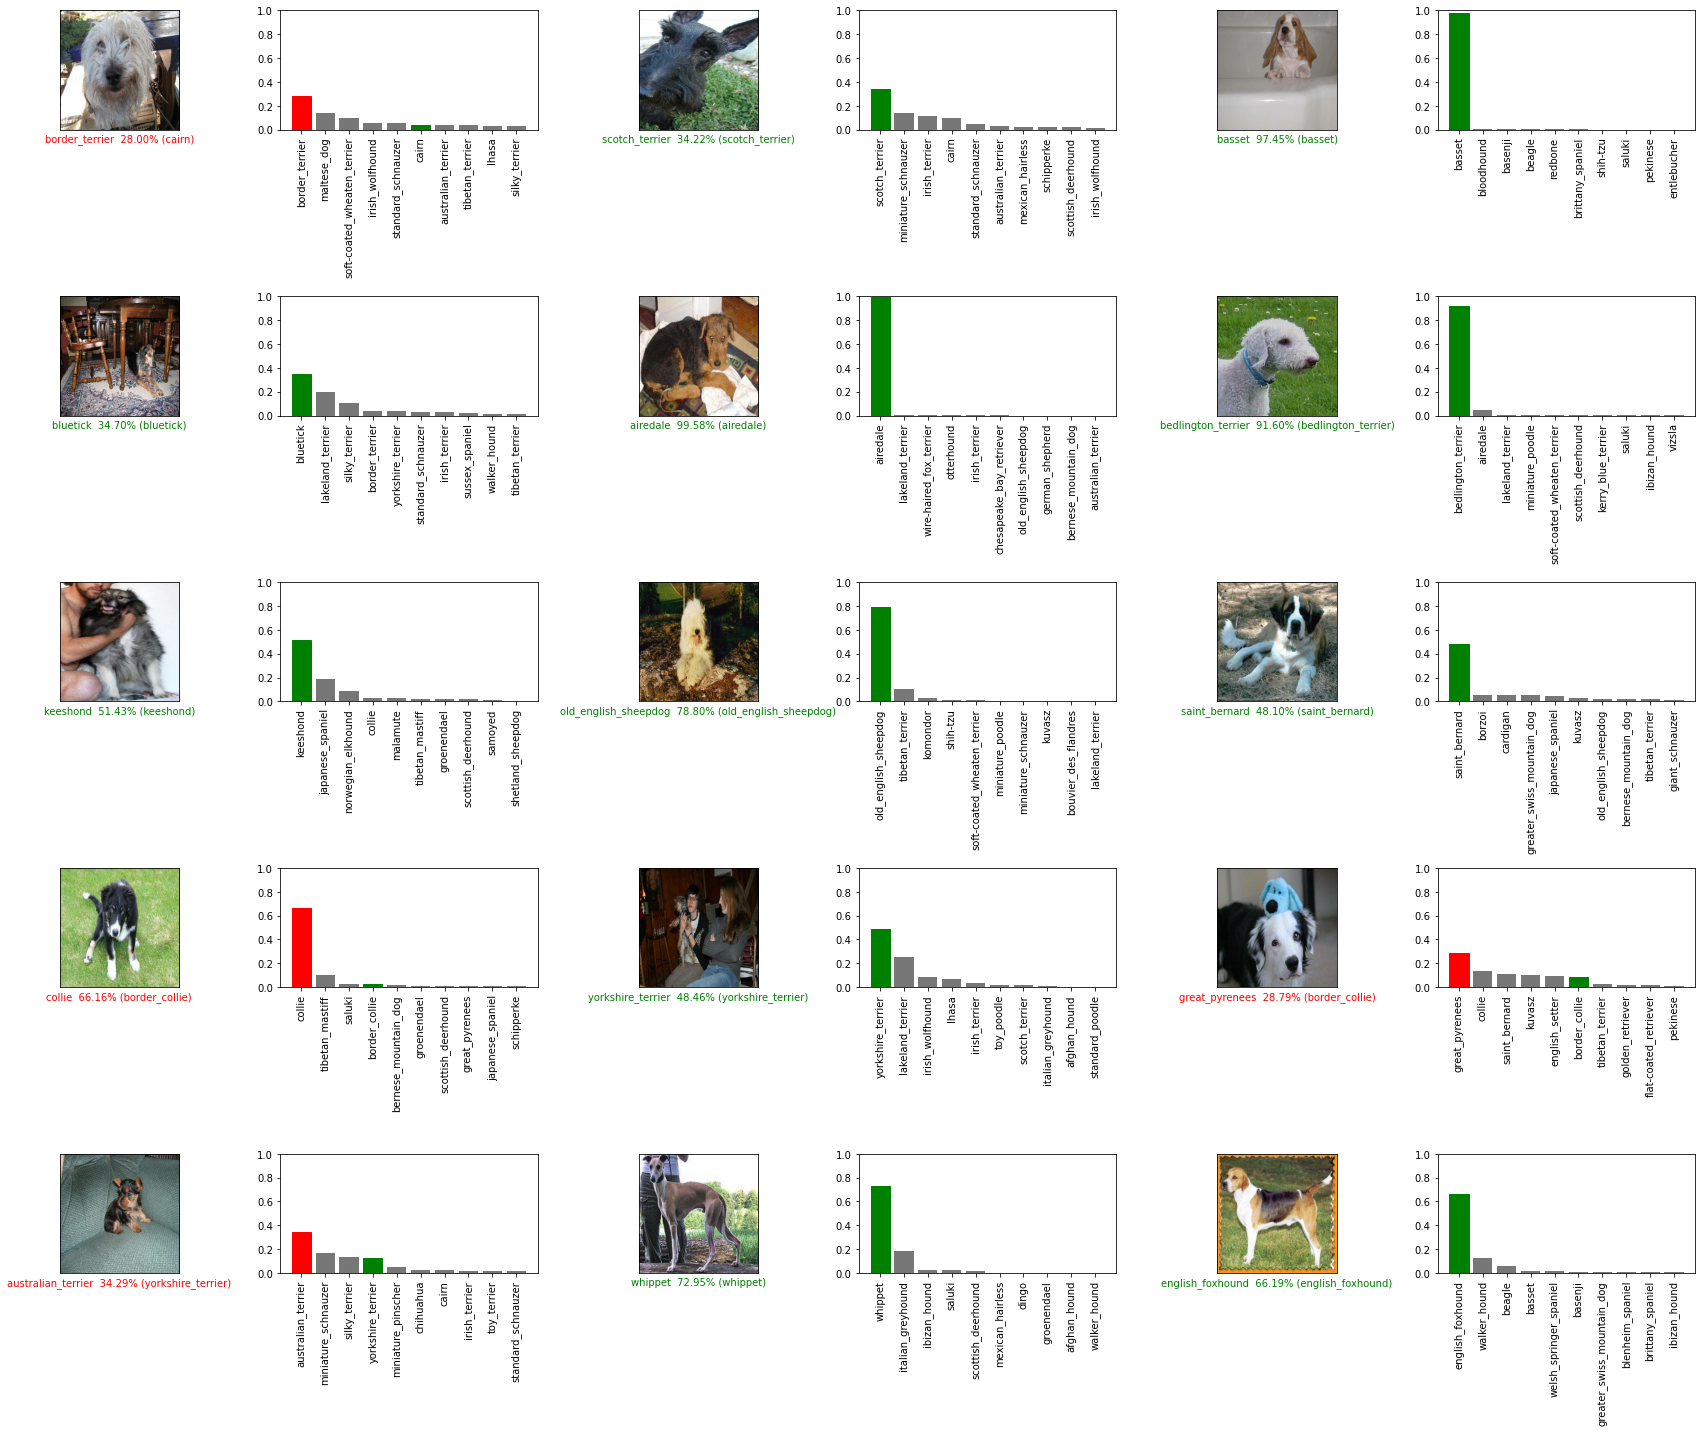

In [209]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, unbatch_val_labels, unbatch_val_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    
    plot_value_array(i, predictions, unbatch_val_labels)
plt.tight_layout()
plt.show()

It can be seen that even when the model is confused, the prediction probability is sometimes very high.

## Saving and Loading a Trained Model

In [213]:
def save_model(model, suffix = None):
    modeldir = os.path.join('./saved_model', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    model_path = f'{modeldir}_{suffix}.h5'
    print(f'Saving model to: {model_path}...')
    model.save(model_path)
    return model_path

In [214]:
def load_model(model_path):
    print(f'Loading saved model from: {model_path}...')
    model = tf.keras.models.load_model(model_path, custom_objects = {'KerasLayer': hub.KerasLayer})
    return model

### Use the helper functions to save and load model

In [216]:
model_path = save_model(model_gpu, suffix = '1000-images-mobilenetv2-Adam')

Saving model to: ./saved_model\20250114-155929_1000-images-mobilenetv2-Adam.h5...


In [217]:
loaded_1k_image_model = load_model(model_path)

Loading saved model from: ./saved_model\20250114-155929_1000-images-mobilenetv2-Adam.h5...


In [218]:
loaded_1k_image_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Evaluate model before saving

In [219]:
model_gpu.evaluate(val_data)

7/7 [==============================] - 1s 59ms/step - loss: 1.3549 - accuracy: 0.6300


[1.354888916015625, 0.6299999952316284]

### Evaluate loaded model

In [220]:
loaded_1k_image_model.evaluate(val_data)

7/7 [==============================] - 1s 61ms/step - loss: 1.3549 - accuracy: 0.6300


[1.354888916015625, 0.6299999952316284]